### Задание 1

1. Залить в свою БД данные по продажам (часть таблицы Orders в csv, исходник здесь https://drive.google.com/drive/folders/1C3HqIJcABblKM2tz8vPGiXTFT7MisrML?usp=sharing )
2. Проанализировать, какой период данных выгружен
3. Посчитать кол-во строк, кол-во заказов и кол-во уникальных пользователей, кот совершали заказы.
4. По годам посчитать средний чек, среднее кол-во заказов на пользователя, сделать вывод , как изменялись это показатели Год от года.
5. Найти кол-во пользователей, кот покупали в одном году и перестали покупать в следующем.
6. Найти ID самого активного по кол-ву покупок пользователя.

In [100]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('orders_all.csv', sep = ";")

In [3]:
df.head(5)

,id_order,id_user,price,o_date
0,129,1,1337,26.04.2013
1,130,155,182,26.04.2013
2,131,1,602,26.04.2013
3,132,1,863,26.04.2013
4,133,1,2261,29.04.2013
...,...,...,...,...
4365726,16836178,4285099,0,00.00.0000
4365727,16839826,4285099,0,00.00.0000
4365728,16885534,4285099,0,00.00.0000
4365729,16955236,3764611,0,00.00.0000


In [24]:
a = df['o_date'][df['o_date'] !='00.00.0000'].min()
b = df['o_date'].max()

In [25]:
# Проанализировать, какой период данных выгружен

print(f'Выгружен период с {a} по {b}')

Выгружен период с 01.01.2014 по 31.12.2017


In [26]:
df.shape[0] #кол-во строк

4365731

In [30]:
len(df["id_order"].unique()) #количество заказов, включая нулевые

4365731

In [60]:
df = df[df["price"] !=0] #убираем строки с нулевой ценой

In [61]:
len(df["id_order"].unique()) #количество заказов, исключая нулевые

4310194

In [39]:
len(df["id_user"].unique()) #кол-во уникальных пользователей, кот совершали заказы

2146691

In [65]:
def year(s):
    return s.split(".")[2]

In [67]:
df['year'] = df['o_date'].apply(year)

In [90]:
df = df[df['price']!= 7000000000000000] #удаляем выброс в 2013 году

In [101]:
av_bill = df['price'].groupby(df["year"]).sum() / df['id_order'].groupby(df["year"]).count() #средний чек по годам

In [102]:
av_bill

year
2013    2197.788111
2014    2287.713696
2015    2018.174961
2016    2096.035295
2017    2398.829497
2018    2302.788797
dtype: float64

Text(0.5, 1.0, 'Uncorrelated Random Signal \\mu to generate x')

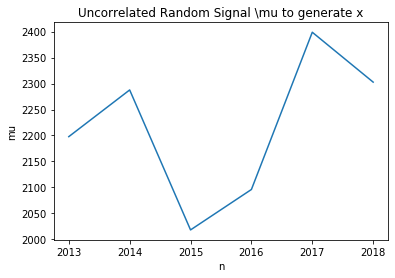

In [103]:
plt.plot(av_bill)
plt.ylabel("Average bill, rub")
plt.xlabel("Year")
plt.title('Uncorrelated Random Signal \mu to generate x')

In [97]:
df['id_order'].groupby(df["year"]).count() /df['id_user'].groupby(df["year"]).nunique() #среднее кол-во заказов на пользователя

year
2013    1.281316
2014    1.495294
2015    1.912758
2016    1.935134
2017    1.742967
2018    1.624699
dtype: float64

In [99]:
df['price'].groupby(df["id_user"]).sum().nlargest(1) # ID самого активного по кол-ву покупок пользователя (по сумме денег)

id_user
39506    26878775
Name: price, dtype: int64